Conjunto de dados MNIST, que consiste em dígitos escritos à mão. 

O objetivo deste conjunto de dados é classificar corretamente os dígitos manuscritos de 0 a 9. Em vez de utilizar todo o conjunto de dados (que consiste em 60.000 imagens de treinamento e 10.000 imagens de teste), usaremos um pequeno subconjunto dos dados fornecidos pela biblioteca scikit-learn - este subconjunto inclui 1.797 dígitos.

In [4]:
import numpy as np
import pandas as pd
from sklearn import datasets, svm,metrics
import matplotlib.pyplot as plt

Base de Dados do Sklearn

In [5]:
digitos=datasets.load_digits()

In [6]:
print(digitos.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [24]:
digitos.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [47]:
#Visualizando a variável Target
targest=digitos.target_names

In [8]:
N_samples=len(digitos.images)
dados=digitos.images.reshape((N_samples,-1))
classe=digitos.target

In [9]:
dados=pd.DataFrame(dados)
dados['classe']=classe

In [10]:
dados.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,classe
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [11]:
from sklearn.model_selection import train_test_split
x=dados.iloc[:,0:64].values
y=dados.iloc[:,64]
Xtreino,Xteste,Ytreino,Yteste= train_test_split(x,y,test_size=0.3)

In [50]:
Xtreino.shape

(1257, 64)

In [51]:
Xteste.shape

(540, 64)

Normalizando os dados

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(Xtreino)
Xtreino=scaler.transform(Xtreino)
Xteste=scaler.transform(Xteste)


In [44]:
#SVD (Single Value Decomposition)
#Redução de Dimensionalidade
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=3)
svd.fit(Xtreino)
XSVD=svd.transform(Xtreino)
X_t_SVD=svd.transform(Xteste)

In [46]:
XSVD
#X_t_SVD

array([[-0.9982636 ,  3.30661367,  1.19304541],
       [ 1.20088148, -1.31853118, -3.90462362],
       [ 0.74419484, -4.79989891,  0.97325241],
       ...,
       [-1.26825528, -1.51288223, -2.87440547],
       [ 0.13883025, -1.85796109, -2.21934914],
       [ 1.48531368,  1.6562524 , -0.62961648]])

Treinando o Modelo

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(XSVD,Ytreino)

KNeighborsClassifier(n_neighbors=3)

In [28]:
Yprev=knn.predict(X_t_SVD)
Yprev

array([1, 6, 3, 0, 5, 2, 0, 3, 1, 4, 9, 7, 2, 5, 2, 1, 0, 7, 3, 9, 5, 1,
       5, 2, 0, 6, 6, 2, 3, 3, 3, 3, 6, 1, 3, 2, 7, 6, 7, 0, 3, 1, 1, 7,
       3, 6, 1, 5, 2, 4, 0, 0, 0, 6, 9, 1, 8, 1, 4, 3, 6, 5, 2, 1, 3, 1,
       0, 4, 0, 7, 0, 6, 2, 6, 1, 1, 5, 8, 6, 1, 4, 2, 5, 6, 3, 4, 7, 2,
       5, 1, 2, 0, 4, 8, 7, 9, 9, 3, 8, 4, 6, 2, 8, 9, 4, 0, 6, 1, 4, 2,
       6, 1, 0, 1, 1, 1, 6, 0, 0, 7, 7, 7, 3, 9, 9, 0, 3, 3, 1, 1, 1, 0,
       8, 2, 1, 7, 9, 1, 3, 0, 3, 7, 1, 6, 0, 9, 9, 9, 7, 2, 0, 2, 0, 6,
       2, 6, 7, 8, 9, 5, 4, 1, 5, 9, 9, 8, 2, 9, 2, 0, 0, 7, 5, 6, 6, 5,
       3, 1, 1, 1, 3, 2, 1, 0, 9, 7, 3, 4, 8, 4, 1, 4, 0, 3, 4, 1, 3, 5,
       4, 0, 5, 4, 0, 0, 5, 8, 5, 9, 6, 2, 7, 4, 8, 4, 3, 8, 9, 1, 7, 6,
       1, 0, 1, 0, 1, 7, 7, 3, 5, 2, 2, 8, 4, 0, 5, 2, 1, 2, 9, 2, 2, 6,
       5, 5, 6, 4, 2, 1, 1, 1, 0, 3, 1, 2, 3, 0, 1, 8, 4, 3, 5, 6, 3, 3,
       2, 4, 4, 0, 2, 2, 3, 4, 6, 9, 6, 4, 6, 3, 5, 1, 7, 3, 1, 8, 1, 1,
       7, 9, 2, 9, 2, 1, 1, 0, 6, 0, 3, 7, 0, 6, 2,

In [29]:
from sklearn import metrics
print(metrics.classification_report(Yteste,Yprev))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67        55
           1       0.47      0.74      0.58        57
           2       0.48      0.61      0.54        54
           3       0.43      0.46      0.45        56
           4       0.91      0.86      0.88        56
           5       0.28      0.21      0.24        56
           6       0.84      0.82      0.83        60
           7       0.67      0.63      0.65        46
           8       0.17      0.11      0.13        46
           9       0.39      0.22      0.28        54

    accuracy                           0.55       540
   macro avg       0.53      0.54      0.52       540
weighted avg       0.53      0.55      0.53       540



In [30]:
from sklearn.metrics import  confusion_matrix
matriz_conf=confusion_matrix(Yteste,Yprev)
print(matriz_conf)

[[40  3  0  0  2  0  9  0  1  0]
 [ 2 42  1  0  0  3  0  2  6  1]
 [ 0  5 33 10  0  0  0  1  1  4]
 [ 1  1 18 26  0  2  0  3  2  3]
 [ 6  0  0  1 48  1  0  0  0  0]
 [ 2 10  6  8  1 12  0  5  7  5]
 [10  0  0  0  1  0 49  0  0  0]
 [ 0  5  0  4  1  5  0 29  1  1]
 [ 3 13  5  4  0 11  0  0  5  5]
 [ 1 10  6  7  0  9  0  3  6 12]]


Utilizando Validação Cruzada

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
Xnorm=scaler.transform(x)


In [33]:
from sklearn.model_selection import cross_val_score
scores_norm=cross_val_score(knn,Xnorm,y,cv=5)
scores_norm

array([0.93888889, 0.91944444, 0.95543175, 0.97214485, 0.93871866])

In [31]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn,x,y,cv=5)
scores

array([0.95555556, 0.95833333, 0.96657382, 0.98607242, 0.96657382])

Procurando o melhor valor para K

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
k_lista=list(range(1,31))

In [38]:
k_valores=dict(n_neighbors=k_lista)


In [39]:
grid=GridSearchCV(knn,k_valores,cv=5, scoring='accuracy')
grid.fit(x,y)

In [40]:
grid.fit(Xnorm,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [41]:
grid.cv_results_

{'mean_fit_time': array([0.00139961, 0.        , 0.00361667, 0.00040421, 0.        ,
        0.00321002, 0.00013909, 0.00260878, 0.00321293, 0.00523105,
        0.0020103 , 0.        , 0.00521965, 0.00040526, 0.00040531,
        0.00040598, 0.00201154, 0.00241971, 0.00242138, 0.00161281,
        0.00160584, 0.00080957, 0.00240612, 0.00400271, 0.00116649,
        0.00219436, 0.00179605, 0.00159645, 0.        , 0.0064261 ]),
 'std_fit_time': array([0.001742  , 0.        , 0.00367792, 0.00080843, 0.        ,
        0.00393146, 0.00027819, 0.0029487 , 0.00393503, 0.0035036 ,
        0.00310722, 0.        , 0.00432447, 0.00081053, 0.00081062,
        0.00081196, 0.00311147, 0.002945  , 0.00294644, 0.00322561,
        0.00321169, 0.00099152, 0.00294174, 0.00305131, 0.00117008,
        0.0003989 , 0.00039914, 0.00079823, 0.        , 0.00321305]),
 'mean_score_time': array([0.03671851, 0.03113079, 0.02657518, 0.03379879, 0.04031749,
        0.03716121, 0.03425198, 0.0378118 , 0.03706422, 0.03

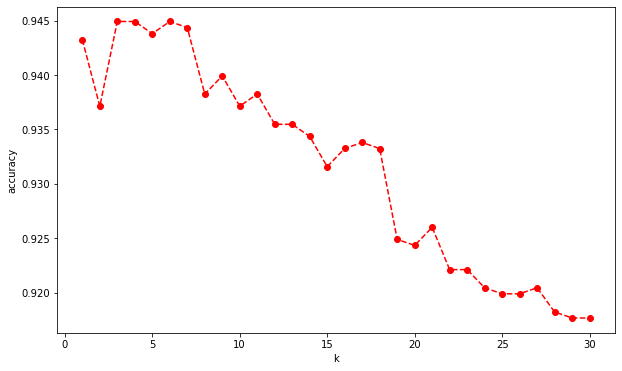

In [42]:
scores=[]
results = grid.cv_results_
for mean in results['mean_test_score']:
    scores.append(mean)


plt.figure(figsize=(10,6))
plt.plot(k_lista,scores,color='red',linestyle='dashed',marker='o')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

In [43]:
print("Melhor valor de k = {} com o valor {} de acurácia".format(grid.best_params_,grid.best_score_))

Melhor valor de k = {'n_neighbors': 3} com o valor 0.9449257195914577 de acurácia
